In [2]:
# Imports

from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

In [74]:
news_tables = {}
tickers = ['TSLA','BA']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [75]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        


In [76]:
# parsed_news

In [77]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# # Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# # Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# # Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head(50)

,ticker,date,time,headline,neg,neu,pos,compound
0,TSLA,2021-07-28,08:26PM,Join Spire Global CEO in Fireside Chat at 1pm ...,0.000,0.845,0.155,0.2960
1,TSLA,2021-07-28,07:58PM,"The Chip-Shortage Recovery Will Be Rocky, as A...",0.000,1.000,0.000,0.0000
2,TSLA,2021-07-28,06:37PM,"Ford Beats With Surprise Profit, Lifts Outlook...",0.000,0.486,0.514,0.7511
3,TSLA,2021-07-28,06:00PM,Tesla's Moving Out of Malls...And Into Their P...,0.000,1.000,0.000,0.0000
4,TSLA,2021-07-28,05:47PM,Is Li Auto Stock A Buy Now? Shares Volatile Am...,0.187,0.667,0.147,-0.1531
5,TSLA,2021-07-28,04:36PM,Ford earnings beat Q2 estimates,0.000,1.000,0.000,0.0000
6,TSLA,2021-07-28,04:17PM,EV Trucks: Will They Fly?,0.000,1.000,0.000,0.0000
7,TSLA,2021-07-28,03:24PM,"Top Research Reports for Tesla, Disney & Wells...",0.000,0.612,0.388,0.4215
8,TSLA,2021-07-28,03:07PM,Tesla Blew Away Earnings. Shares Fell. What Gi...,0.000,0.761,0.239,0.2960
9,TSLA,2021-07-28,01:56PM,Is Lucid Motors Stock A Buy Right Now As LCID ...,0.000,1.000,0.000,0.0000


In [84]:
import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf

data=yf.Ticker(ticker).history(period= "5d", interval = "1d").reset_index()
fig = px.line(data, x='Date', y="Open")

mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()
mean_scores1 = mean_scores.unstack()
mean_scores11 = mean_scores1.xs('compound', axis="columns").transpose()
fig2=px.bar(mean_scores11,barmode='group',title= 'Compound sentiment scores of news aticles')
# # fig.add_trace(fig2.data[0])
# fig.show()

In [85]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-07-22,221.520004,222.250000,218.309998,220.869995,9768900,0,0
1,2021-07-23,222.970001,224.630005,220.940002,221.520004,9357000,0,0
2,2021-07-26,220.000000,226.119995,219.889999,225.850006,8928900,0,0
3,2021-07-27,223.169998,225.699997,220.419998,222.270004,8768900,0,0
4,2021-07-28,234.050003,237.490005,231.330093,231.570007,19123495,0,0


In [79]:
mean_scores11

ticker,BA,TSLA
date,,
2021-07-14,0.266300,NaN
2021-07-15,-0.053567,NaN
2021-07-16,0.308100,NaN
2021-07-17,0.172600,NaN
2021-07-19,-0.219862,NaN
2021-07-20,0.087600,NaN
2021-07-21,0.010125,NaN
2021-07-22,0.406750,NaN
2021-07-25,0.008350,NaN


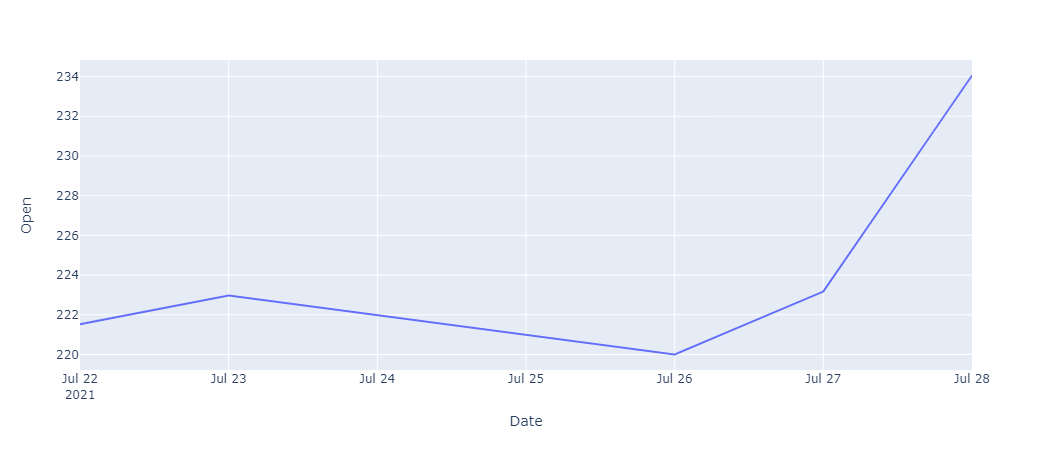

In [80]:
fig

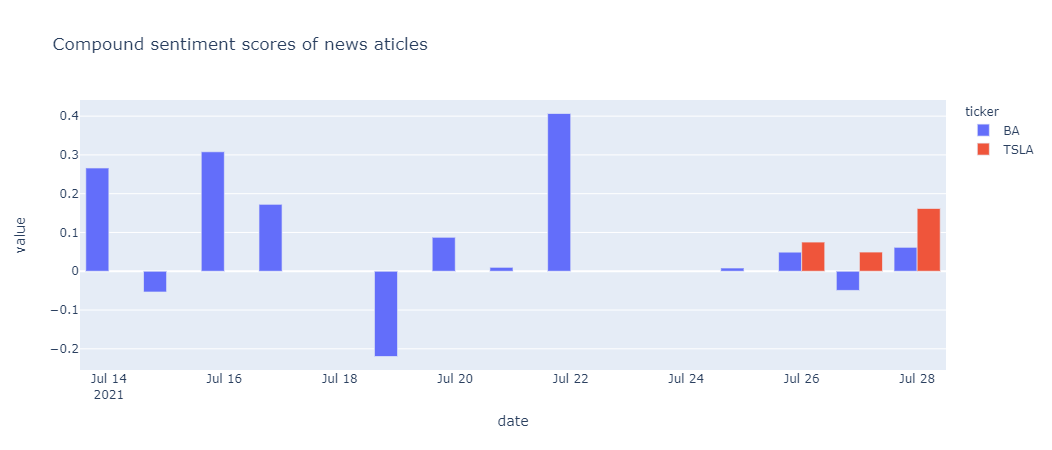

In [81]:
fig2

In [82]:

# doesnot work?????
# fig = go.Figure()
# stock = (yf.Ticker(ticker)).history(period= "7d", interval = "1d").reset_index()
# fig.add_trace(
#     go.Scatter(
#         stock, x='Datetime', y="Open", title="Price movement"
#     ))